In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import datetime as dt
import calendar


import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Unemployment.csv")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour Participation Rate (%)","Area"]

In [6]:
df.head(10)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   state                                    740 non-null    object 
 1   date                                     740 non-null    object 
 2   frequency                                740 non-null    object 
 3   estimated unemployment rate              740 non-null    float64
 4   estimated employed                       740 non-null    float64
 5   estimated labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [8]:
df.dtypes

state                                       object
date                                        object
frequency                                   object
estimated unemployment rate                float64
estimated employed                         float64
estimated labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [9]:
df.shape

(754, 7)

In [10]:
df.size

5278

In [11]:
df.corr()

,estimated unemployment rate,estimated employed,estimated labour Participation Rate (%)
estimated unemployment rate,1.000000,-0.222876,0.002558
estimated employed,-0.222876,1.000000,0.011300
estimated labour Participation Rate (%),0.002558,0.011300,1.000000


In [12]:
df.isnull().sum()

state                                      14
date                                       14
frequency                                  14
estimated unemployment rate                14
estimated employed                         14
estimated labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [13]:
df1=df.dropna()

In [14]:
df1.isnull().sum()

state                                      0
date                                       0
frequency                                  0
estimated unemployment rate                0
estimated employed                         0
estimated labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [15]:
df1.shape

(740, 7)

In [16]:
duplicate_count = df1.duplicated().sum()
print(duplicate_count)

0


In [17]:
df1.state.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: state, dtype: int64

In [18]:
df1['state'].value_counts().idxmin()

'Chandigarh'

In [19]:
df1['state'].value_counts().idxmax()

'Andhra Pradesh'

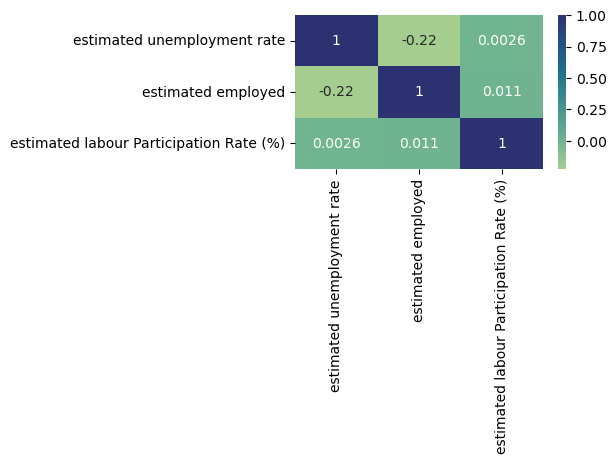

In [26]:
plt.figure(figsize=(4,2))
sns.heatmap(df1.corr(),annot=True,cmap='crest')
plt.show()

In [27]:
df1 = df[["state","estimated employed"]].groupby('state').sum().sort_values("estimated employed", ascending=False)
df1

,estimated employed
state,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Estimated Employee')

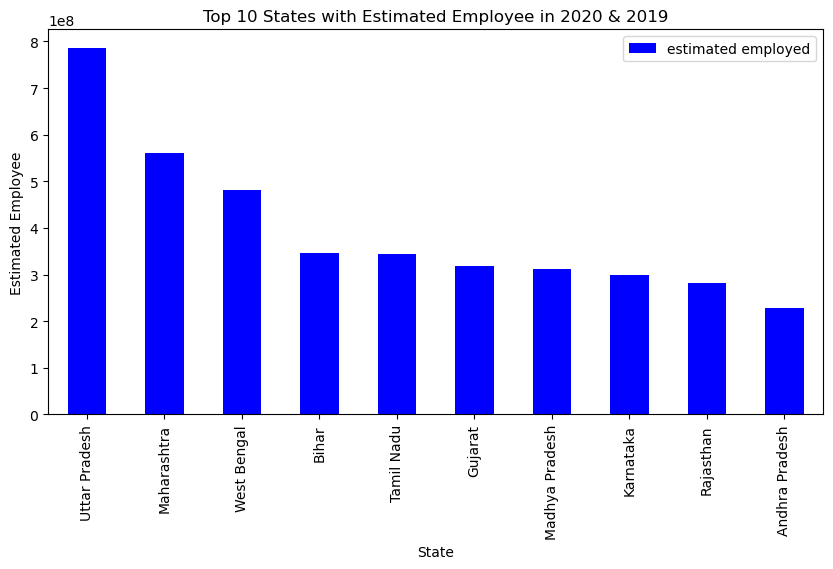

In [35]:
df1[:10].plot(kind='bar',color='blue', figsize=(10,5))
plt.title("Top 10 States with Estimated Employee in 2020 & 2019")
plt.xlabel('State')
plt.ylabel('Estimated Employee')